# **MNIST Fashion Dataset Image Classification**

## **About Dataset**

MNIST Fashion Dataset consists of ***70,000 images*** of Fashion Dataset with ***28 X 28 pixel size***.

**Goal:**

Is to build a ***MLP neural network model*** which is able to classify the input image into ***10 classes namely,***

1. T-Shirt/Top
2. Trouser
3. PullOver
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle Boot

## **Importing Libraries**

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Flatten, Dense

## **Loading, Understading & Preparing Dataset**

In [ ]:
#Loading the dataset
fashion_mnist = keras.datasets.fashion_mnist #Keras has inbuilt fashion dataset which can be called
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() #This inbuilt dataset is already split into training & testing data which can be called like this

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Checking the number of images and datatype in training data
print("X_train data_type: " , X_train_full.dtype)
print("X_train shape: " , X_train_full.shape)

print("y_train shape: " , y_train_full.shape)
print("y_train data_type: " , y_train_full.dtype)

X_train data_type:  uint8
X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
y_train daya_type:  uint8


In [ ]:
#Checking the number of images and datatype in testing data
print("X_test data_type: " , X_train_full.dtype)
print("X_test shape: " , X_train_full.shape)

print("y_test shape: " , y_train_full.shape)
print("y_test dayta_type: " , y_train_full.dtype)

In [ ]:
#As the validation data is not present - Allocating validation data for checking model performance
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[2]]

'Sneaker'

## **Model 1 : Simple 3 Layer MLP**

In [ ]:
#Model Architecture
model = Sequential([
    # Pooling and Dense layers
    Flatten(input_shape=[28, 28]),
    Dense(12, activation='relu'),      # Add a dense layer with 12 units and ReLU activation
    Dense(11, activation='relu'),       # Add a dense layer with 11 units and ReLU activation
    Dense(10, activation='softmax')      # Output layer with 10 units and softmax activation
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 12)                9420      
                                                                 
 dense_1 (Dense)             (None, 11)                143       
                                                                 
 dense_2 (Dense)             (None, 10)                120       
                                                                 
Total params: 9683 (37.82 KB)
Trainable params: 9683 (37.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Model1 Variation 1**

In [ ]:
#Compiling the model
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=Adam(learning_rate=0.0001))

In [ ]:
#Employing Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=10, min_delta=0.001 ,  restore_best_weights=True)
#Fitting the model
model_hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 7s 3ms/step - loss: 1.2585 - accuracy: 0.5818 - val_loss: 0.7452 - val_accuracy: 0.7626
Epoch 2/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6740 - accuracy: 0.7742 - val_loss: 0.6035 - val_accuracy: 0.8032
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5843 - accuracy: 0.8019 - val_loss: 0.5450 - val_accuracy: 0.8202
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5389 - accuracy: 0.8159 - val_loss: 0.5123 - val_accuracy: 0.8286
Epoch 5/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5112 - accuracy: 0.8255 - val_loss: 0.4912 - val_accuracy: 0.8326
Epoch 6/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4922 - accuracy: 0.8307 - val_loss: 0.4760 - val_accuracy: 0.8414
Epoch 7/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4786 - accuracy: 0.8367 - val_loss: 0.4685 - val_accuracy:

**Evaluating the Model**

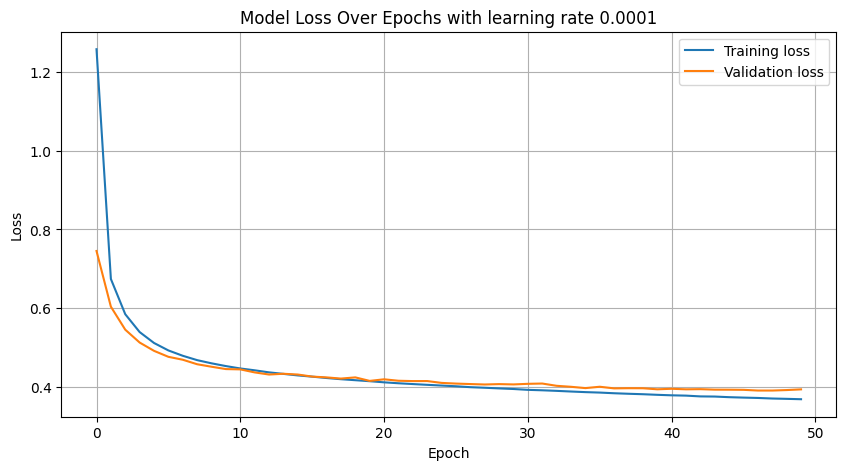

In [ ]:
#Plotting Epochs Vs Loss to check whether Gradient Descent(Back Prop) is working
plt.figure(figsize=(10, 5))
plt.plot(model_hist.history['loss'], label='Training loss')
plt.plot(model_hist.history['val_loss'], label='Validation loss')
plt.title('Model Loss Over Epochs with learning rate 0.0001')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

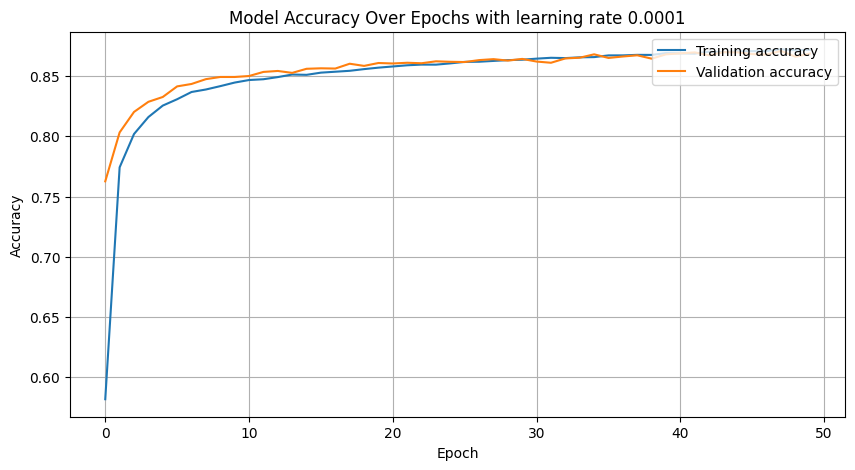

In [ ]:
#Plotting Epochs Vs Loss to check whether Gradient Descent(Back Prop) is working
plt.figure(figsize=(10, 5))
plt.plot(model_hist.history['accuracy'], label='Training accuracy')
plt.plot(model_hist.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy Over Epochs with learning rate 0.0001')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
#Evaluating on testing data
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8480


[0.4381052851676941, 0.8479999899864197]

In [ ]:
# Predicting 10 images labels from testing data
X_new = X_test[:10]
y_pred = model.predict(X_new)
class_predictions = np.argmax(y_pred, axis=1)
class_name_predictions = [class_names[label] for label in class_predictions]
print(class_predictions)
print(class_name_predictions)


1/1 [==============================] - 0s 72ms/step
[9 2 1 1 6 1 4 6 5 7]
['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


In [ ]:
#Function to display predicted images with class labels
def display_predictions(images, class_name_predictions):
    plt.figure(figsize=(10, 10))

    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(class_name_predictions[i])
        plt.axis('off')

    plt.show()


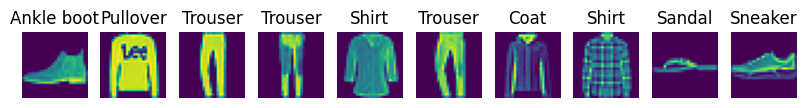

In [ ]:
#Display predicted images
display_predictions(X_new, class_name_predictions)

In [ ]:
#Evaluating testing data with confusion matrix
y_pred_full = model.predict(X_test)
class_predictions_full = np.argmax(y_pred_full, axis=1)
conf_matrix = confusion_matrix(y_test, class_predictions_full)

# Calculate TP, TN, FP, FN for each class
num_classes = len(class_names)
TP = np.zeros(num_classes)
TN = np.zeros(num_classes)
FP = np.zeros(num_classes)
FN = np.zeros(num_classes)

for i in range(num_classes):
    TP[i] = conf_matrix[i, i]
    FP[i] = conf_matrix[:, i].sum() - TP[i]
    FN[i] = conf_matrix[i, :].sum() - TP[i]
    TN[i] = conf_matrix.sum() - (FP[i] + FN[i] + TP[i])

# Display the results
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"True Positives (TP): {TP[i]}")
    print(f"False Positives (FP): {FP[i]}")
    print(f"False Negatives (FN): {FN[i]}")
    print(f"True Negatives (TN): {TN[i]}")
    print("")


313/313 [==============================] - 0s 1ms/step
Class: T-shirt/top
True Positives (TP): 782.0
False Positives (FP): 170.0
False Negatives (FN): 218.0
True Negatives (TN): 8830.0

Class: Trouser
True Positives (TP): 947.0
False Positives (FP): 16.0
False Negatives (FN): 53.0
True Negatives (TN): 8984.0

Class: Pullover
True Positives (TP): 776.0
False Positives (FP): 318.0
False Negatives (FN): 224.0
True Negatives (TN): 8682.0

Class: Dress
True Positives (TP): 865.0
False Positives (FP): 165.0
False Negatives (FN): 135.0
True Negatives (TN): 8835.0

Class: Coat
True Positives (TP): 781.0
False Positives (FP): 286.0
False Negatives (FN): 219.0
True Negatives (TN): 8714.0

Class: Sandal
True Positives (TP): 926.0
False Positives (FP): 45.0
False Negatives (FN): 74.0
True Negatives (TN): 8955.0

Class: Shirt
True Positives (TP): 563.0
False Positives (FP): 292.0
False Negatives (FN): 437.0
True Negatives (TN): 8708.0

Class: Sneaker
True Positives (TP): 958.0
False Positives (FP):

In [ ]:
#Saving the model
model.save("my_fashionimages_model_KG.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Loading the saved model
model_my = keras.models.load_model("/content/my_fashionimages_model_KG.h5")

In [ ]:
#Checking the saved model
model_my.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8480


[0.4381052851676941, 0.8479999899864197]

## **Conclusion**

With this model architectecture with ***very less number of neurons and layers*** we have acheived

1. Training Accuracy of 87.17%.
2. Validation Accuracy of 86.86%
3. Testing Accuracy of 84.80%